# Part I - Ford GoBike System Data
## by Temidayo Akindileni

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## Preliminary Wrangling

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# load dataset into dataframe
df = pd.read_csv("201902-fordgobike-tripdata.csv")
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.shape

(183412, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

## DATA WRANGLING

From visual inspection of the dataset, I can see that some columns will not be needed for this analysis hence there is need to drop them.

In [6]:
# dropping unnecessary columns
df.drop(columns=['start_station_latitude', 'start_station_id', 'end_station_id', 'bike_id', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

In [7]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_name',
       'end_station_name', 'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip'],
      dtype='object')

#### Null values
There are rows with null values so I will drop those rows so as not affect my analysis.

In [8]:
# dropping of null values
df = df.dropna()

#### Changing of datatypes
Some columns have wrong datatypes so there is need to change this datatypes to correct ones.

In [9]:
# using loop for changing  datatypes and dropping unnecessary values
for i in ['start_time', 'end_time']:
    df[i] = df[i].apply(lambda x : x.split ('.')[0])
    df[i] = pd.to_datetime(df[i])  

In [10]:
df["member_birth_year"] = df["member_birth_year"].astype("int")

In [11]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_name                 object
end_station_name                   object
user_type                          object
member_birth_year                   int32
member_gender                      object
bike_share_for_all_trip            object
dtype: object

#### Creating new columns
I will be creating new columns from the existing columns for better analysis.

In [12]:
# Create weekday column
df['weekday'] = df['start_time'].dt.strftime("%A")

# Create time column
df["Hour_of_day"] = df['start_time'].dt.hour

In [13]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_name',
       'end_station_name', 'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip', 'weekday', 'Hour_of_day'],
      dtype='object')

In [14]:
# convert weekday into ordered categorical types
ordinal_var_dict = ['Sunday', 'Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict)
df['weekday'] = df['weekday'].astype(ordered_var)

In [15]:
#transform time in part of the day
bins = [0,4,8,12,16,20,24]
labels = ['Late Night','Early Morning','Morning','Noon','Evening','Night']
df['Hour_of_day'] = pd.cut(df['Hour_of_day'], bins=bins, labels=labels, include_lowest=True)

In [16]:
df[['weekday', 'Hour_of_day']].sample(5)

,weekday,Hour_of_day
7650,Thursday,Morning
135543,Friday,Morning
97735,Friday,Early Morning
115421,Tuesday,Early Morning
103880,Thursday,Morning


In [17]:
# create member age column
df['member_age'] = 2019 - df['member_birth_year']

In [18]:
#drop the unnecessary columns
df.drop(columns=["start_time", "member_birth_year"], axis=1, inplace=True)

### Assessing Cleaned data

In [19]:
df.shape

(174952, 10)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   end_time                 174952 non-null  datetime64[ns]
 2   start_station_name       174952 non-null  object        
 3   end_station_name         174952 non-null  object        
 4   user_type                174952 non-null  object        
 5   member_gender            174952 non-null  object        
 6   bike_share_for_all_trip  174952 non-null  object        
 7   weekday                  174952 non-null  category      
 8   Hour_of_day              174952 non-null  category      
 9   member_age               174952 non-null  int32         
dtypes: category(2), datetime64[ns](1), int32(1), int64(1), object(5)
memory usage: 11.7+ MB


In [23]:
df.describe()

,duration_sec,member_age
count,174952.000000,174952.000000
mean,704.002744,34.196865
std,1642.204905,10.118731
min,61.000000,18.000000
25%,323.000000,27.000000
50%,510.000000,32.000000
75%,789.000000,39.000000
max,84548.000000,141.000000


### What is the structure of your dataset?

There are 174,952 rides with 9 features. This dataset provides detailed rides information for February 2019. The original dataset has the following information.

Ride duration: duration of the rides in seconds
Start and End time: when the ride started and ended
Station Information: the station id, name and location
The user information: user id, year of birth, gender, subscription.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out how subscribers and customers use the service in terms of the duration of the ride, frequency of use, their age and gender.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that subscribers use the service more often

## Univariate Exploration

I'll start by looking at the distribution of the age of the users.

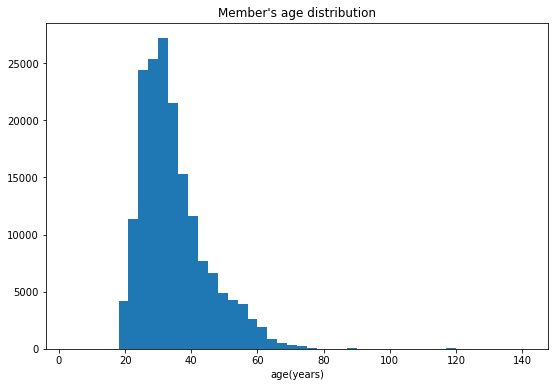

In [24]:
#plot member year of bith distibution
bin = np.arange(3, df["member_age"].max() + 3, 3)
plt.figure(figsize = [9, 6])
plt.hist(data = df, x = 'member_age', bins = bin)
plt.xlabel('age(years)')
plt.title("Member's age distribution");

The member's age has a long-tailed distribution, with a lot of the members on the low age end, and few on the high age end. This shows that the distribution is right-skewedand there are presence of outliers.

To reduce the outliers I will be dropping rows that have member's age greater than 80 as we can see from the graph that the distribution flattens out around 75

In [25]:
# Delete rows with inappropriate values
df.drop(df[df.member_age >= 80].index, inplace=True)

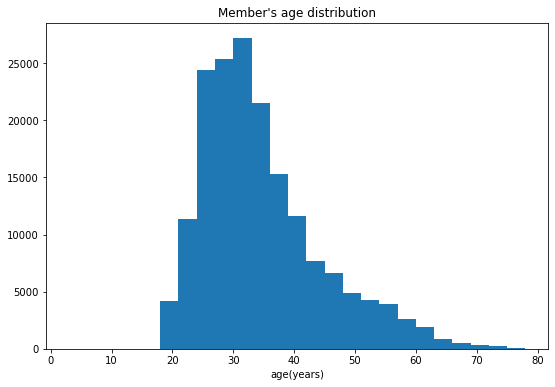

In [26]:
#plot member year of bith distibution
bin = np.arange(3, df["member_age"].max() + 3, 3)
plt.figure(figsize = [9, 6])
plt.hist(data = df, x = 'member_age', bins = bin)
plt.xlabel('age(years)')
plt.title("Member's age distribution");

Here we can see that there is a huge concentration between ages 25 and 35. This could mean that a bulk of the users are between these ages. There is still need for further exploration.

Now, lets look at the distribution of subscription.

C:\Users\AKINDILENI DAYO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


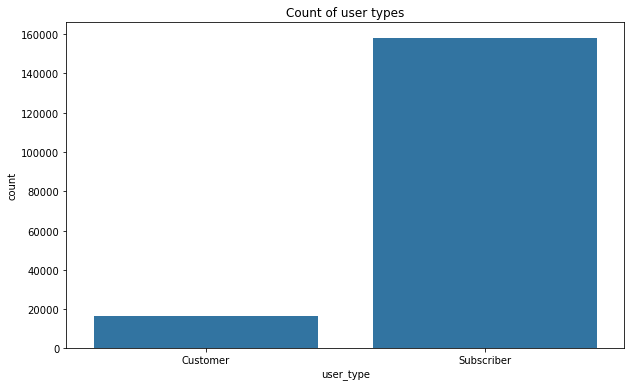

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(df["user_type"], color=sns.color_palette()[0])
plt.title("Count of user types");

From the graph, we can see that there are more Subscribers than Customers.

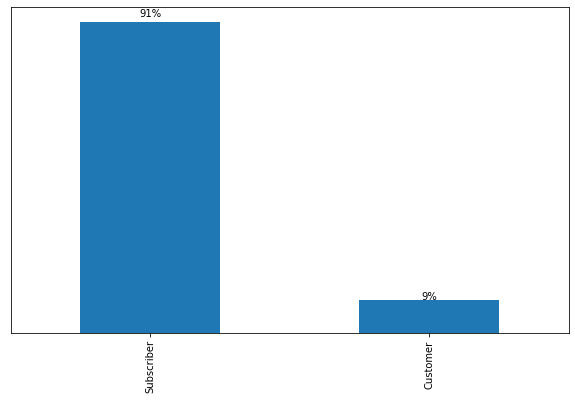

In [28]:
plt.figure(figsize=(10,6))
ax = df["user_type"].value_counts(normalize=True).plot(kind="bar")
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')
plt.yticks([]);

As we can see on the graph, most of the users (91%) have a subscription.

Let's look at the gender distribution.

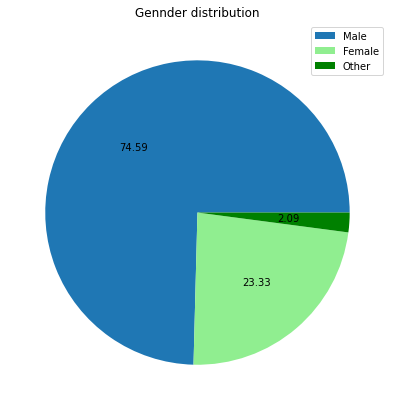

In [29]:
colors = [sns.color_palette()[0], 'lightgreen', 'green']
labels = ("Male", "Female", "Other")
plt.figure(figsize=(10,7))
ax = df["member_gender"].value_counts().plot(kind="pie", colors=colors, autopct='%.2f', labels=None)
plt.legend(labels=labels)
plt.title("Gennder distribution")
ax.axes.get_yaxis().set_visible(False);

Majority of the users are male(74.59%) while minority are Females(23.33%) and Others(2.09%).

Let's look at the distribution of the main variable: duration of trips.

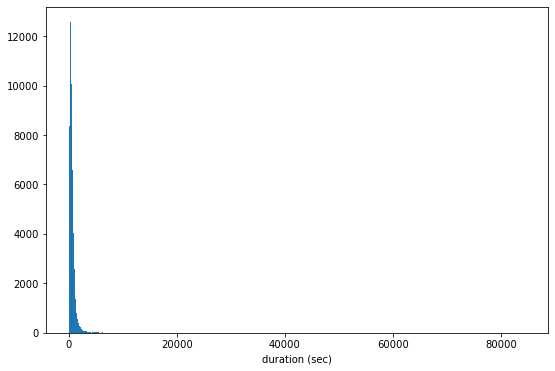

In [30]:
# start with a standard-scaled plot
bins = np.arange(50, df['duration_sec'].max()+50, 50)

plt.figure(figsize=[9, 6])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('duration (sec)')
plt.show()

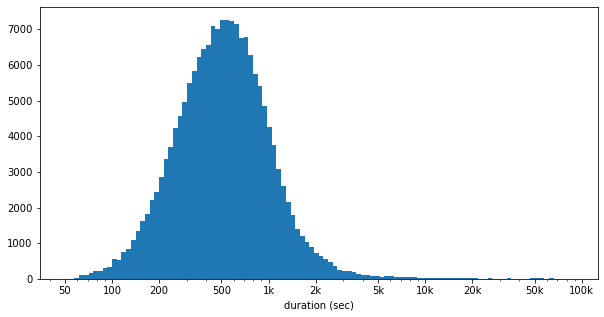

In [31]:
# there is a very long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.03
bins = 10 ** np.arange(1.7, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)
tick = [50, 100, 200, 500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4, 1e5]
label = [50, 100, 200, 500, '1k', '2k', '5k', '10k', '20k','50k', '100k']

plt.figure(figsize=[10, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks(tick, label)
plt.xlabel('duration (sec)')
plt.show()

Duration has a very long-tailed distribution, most trips lasted from 150 seconds to 2000 seconds, and some trips lasted much longer (almost 24 hours).
When plotted on a log-scale, the duration distribution looks unimodal, with a single peak between 450 and 700 seconds.

Onto distribution of the weekdays. Here we will find out how trips are booked based on the days of the week.

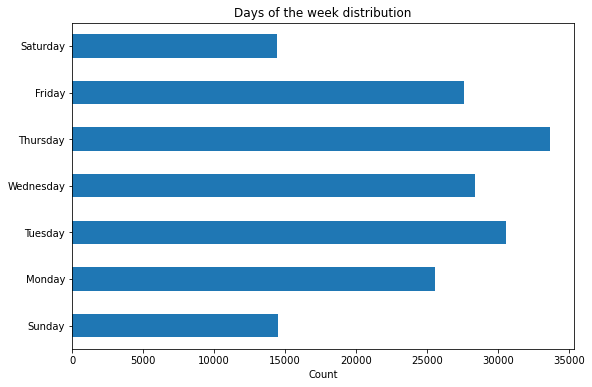

In [32]:
plt.figure(figsize=[9, 6])
df["weekday"].value_counts(sort=False).plot.barh()
plt.xlabel("Count")
plt.title("Days of the week distribution");

From the graph above, we can see that most trips are taken on Thursdays.
For further analysis, there is need to check the time/hour of the day when majority of people take their trips on thursdays.

Before we check the time/hour of the day when majority of people take their trips on thursdays, lets check the daily period distribution first.

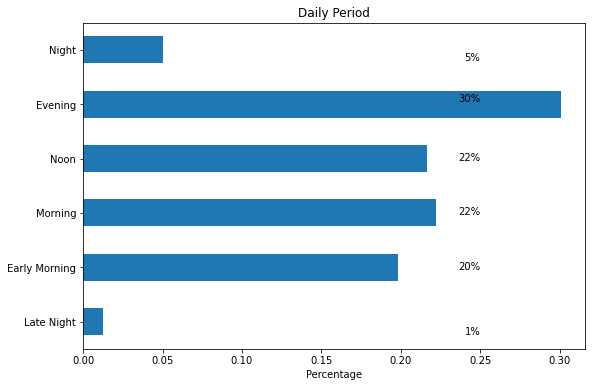

In [33]:
plt.figure(figsize=[9, 6])
ax = df["Hour_of_day"].value_counts(normalize=True, sort=False).plot.barh()
for p in ax.patches:
    height = p.get_width()
    width = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='right')
plt.xlabel("Percentage")
plt.title("Daily Period");

As we can see, most trips(30%) are taken in the evening(16th-20th hour) while few trips are taken late night which is understandable as most people will be indoor late at night.

C:\Users\AKINDILENI DAYO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


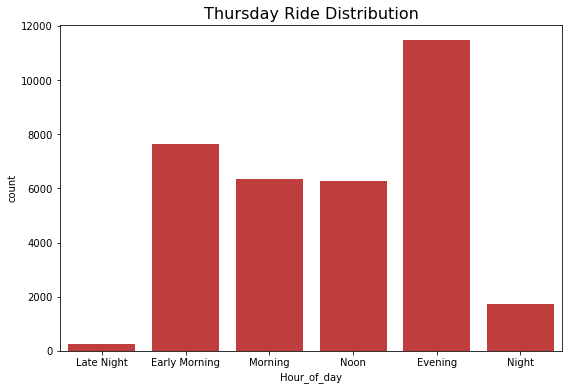

In [34]:
Thursday = df[df["weekday"]== "Thursday"]
plt.figure(figsize=(9,6))
sns.countplot(Thursday["Hour_of_day"], color=sns.color_palette()[3])
plt.title("Thursday Ride Distribution", fontsize=16)
plt.show()

This shows that on Thursdays, majority of people take their trips in the evening(16th -20th hour of the day). COuld this be the reason why we have majority of trips in the evening from the previous graph?

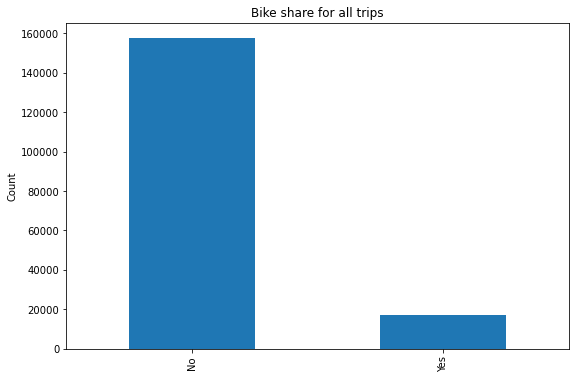

In [35]:
plt.figure(figsize=[9, 6])
df['bike_share_for_all_trip'].value_counts().plot.bar()
plt.ylabel("Count")
plt.title("Bike share for all trips");

Here, majority of the trips undertaken by individuals are not fully completed by the bikes shared.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

About 91% have subscription while 9% are customers. During the exploration of the duration variable, I had to perform a log transformation and i found out that majority of the trips lasted between 150 and 2000seconds.

Also, I found out that most trips happened on thursday evenings.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The member's age had a right-skewed distribution signifying presence of outliers. I had to adjust the variable by dropping some rows because a skewed distribution can lead to wrong analysis.

## Bivariate Exploration


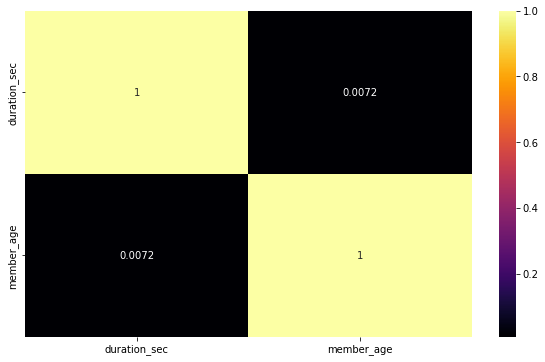

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="inferno");

## Relationship Between The Duration Of The Trip And The Age
The scatterplot shows an increased concentration of points between ages 25 and 35. Also the scatterplot shows that few aged people took rides and the rides had short durations.

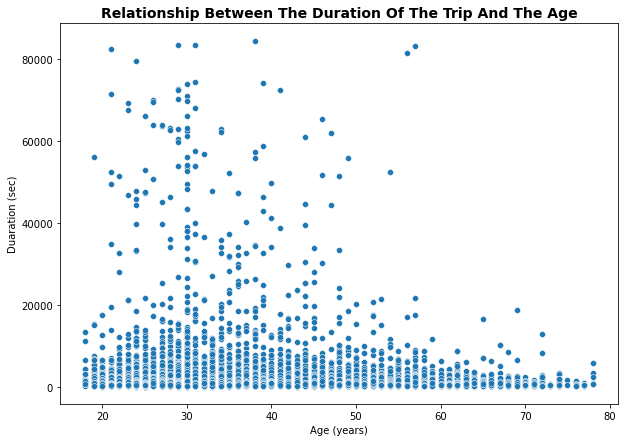

In [37]:
plt.figure(figsize = [10, 7])
sns.scatterplot(data=df, x="member_age", y="duration_sec")
plt.xlabel('Age (years)')
plt.ylabel('Duaration (sec)')
plt.title('Relationship Between The Duration Of The Trip And The Age', 
            fontsize=14, fontweight='semibold')
plt.show();

From the heatmap above we can see that the pearson coefficient shows no correlation among the variables but the scatterplot above shows an increased concentration of points between ages 25 and 35. Also the scatterplot shows that few aged people took rides and the rides had short durations.

Now let's find out the average durations of each user type and which day has the highest duration

In [38]:
dfp = df.pivot_table(index='weekday', columns='user_type', values="duration_sec", aggfunc='mean')
dfp

user_type,Customer,Subscriber
weekday,,
Sunday,1667.036973,707.182810
Monday,1366.128250,631.503351
Tuesday,1034.472198,622.327937
Wednesday,1228.843602,619.986533
Thursday,1181.864969,631.631509
Friday,1114.483833,637.814655
Saturday,1643.620849,709.318408


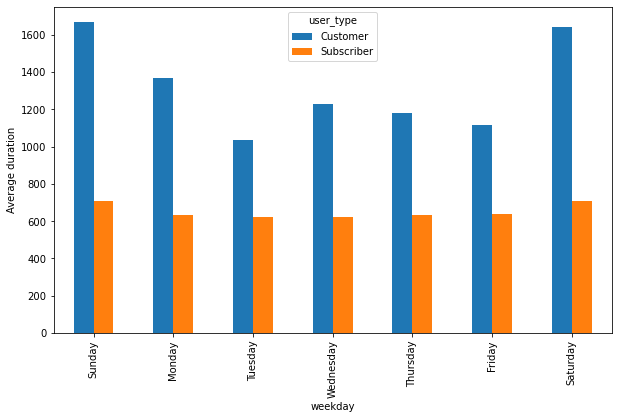

In [39]:
dfp.plot(kind="bar", figsize=(10,6))
plt.ylabel("Average duration");

Here we can see that highest average duration by customers was done on Sunday(1667.04secs) while that of subscribers was on saturday(709.32secs).

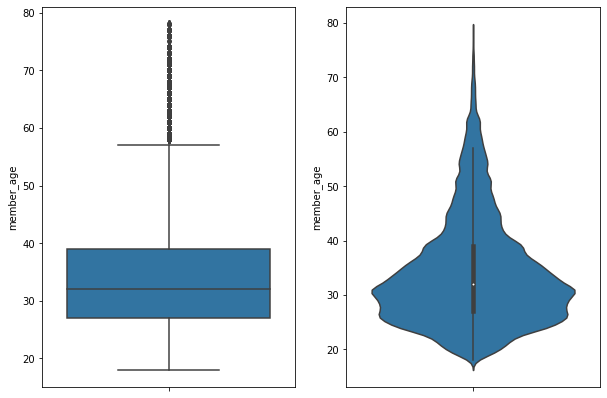

In [40]:
fig, ax = plt.subplots(ncols=2, figsize = [10, 7])
sns.boxplot(data=df, y="member_age", ax=ax[0])
sns.violinplot(data=df, y="member_age", ax=ax[1]);

The boxplot above shows the presence of outliers in the member's age from age 60 and above.
The violinplot shows a huge density around ages 25 and 33. It also shows outliers from age 70 and above.

C:\Users\AKINDILENI DAYO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


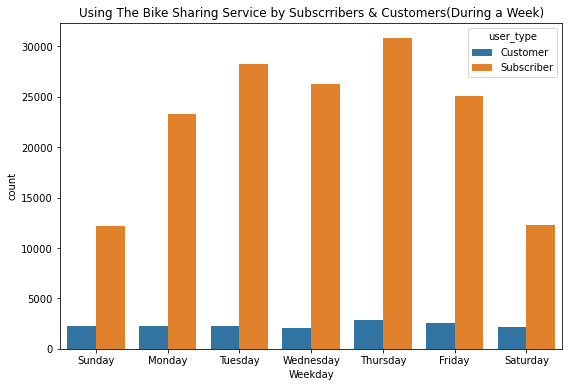

In [41]:
plt.figure(figsize=[9, 6])
sns.countplot(df["weekday"], hue=df["user_type"])
plt.xlabel("Weekday")
plt.title("Using The Bike Sharing Service by Subscrribers & Customers(During a Week)");

From analysis made above we saw that most trips occurred on thursdays and here we can see that the bulk of this trips were made by subscribers.
Also, among the customers, the majority of the trips occurred on thursdays followed by fridays.

C:\Users\AKINDILENI DAYO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


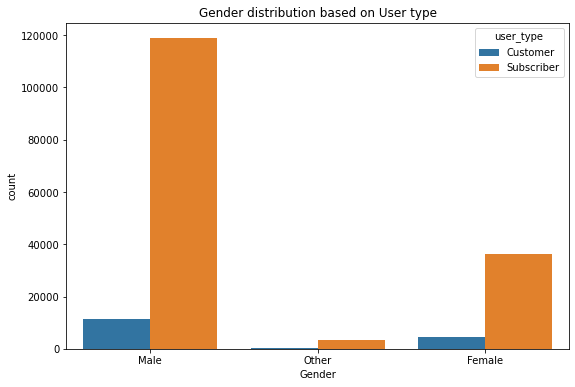

In [42]:
plt.figure(figsize=[9, 6])
sns.countplot(df["member_gender"], hue=df["user_type"])
plt.xlabel("Gender")
plt.title("Gender distribution based on User type");

This shows that the subscribers is made up of majorly males a few females. Also, the customers is ,made up of majorly men
This means males are the major users. Hence, future advertisements can be targetted at males.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
The analysis showed that subscribers who happen to be the major users go on trips during the weekdays and lesser trips on weekends while customers go on more trips on weekends than weekdays. Also, in terms of average trip duration, customers go on longer trips than subscribers both on weekdays and weekends.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Younger people between ages 25 and 35 took the longest trips and as the age increased there was reduction in duration of trips.

## Multivariate Exploration
Here, I want to analyse how each gender went on trips and also if they are sibscribers or customers.

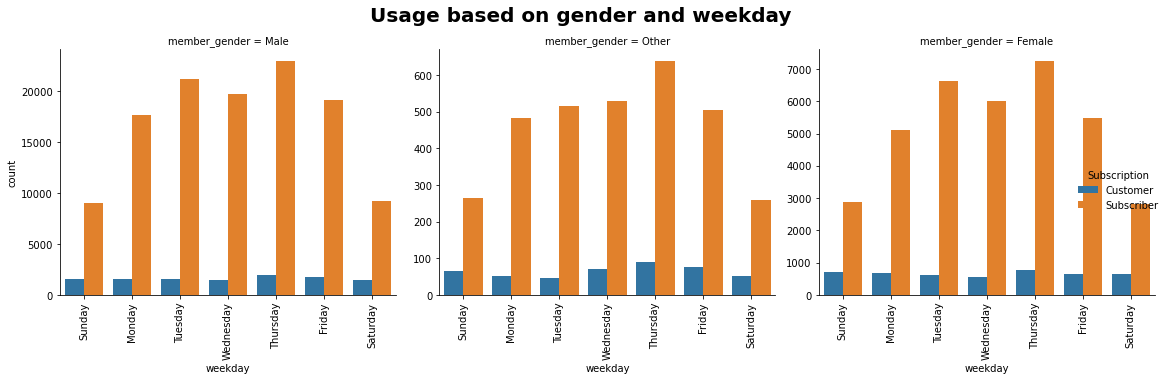

In [43]:
ax = sns.catplot(data=df, x='weekday', col='member_gender', hue='user_type', 
               kind='count', sharey = False)
ax._legend.set_title('Subscription')
for axes in ax.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()
ax.fig.suptitle("Usage based on gender and weekday", fontsize=20, fontweight="bold", y= 1.05)
plt.show()

This plots above shows that all genders had the highest number of trips on thursday which supports the analysis made earlier on thursday being the day with the highest number of trips.
Also, there is a pattern of a slight increase in number trips for all genders from sunday to Tuesday while there is a pattern of reduction from thursday to saturday.

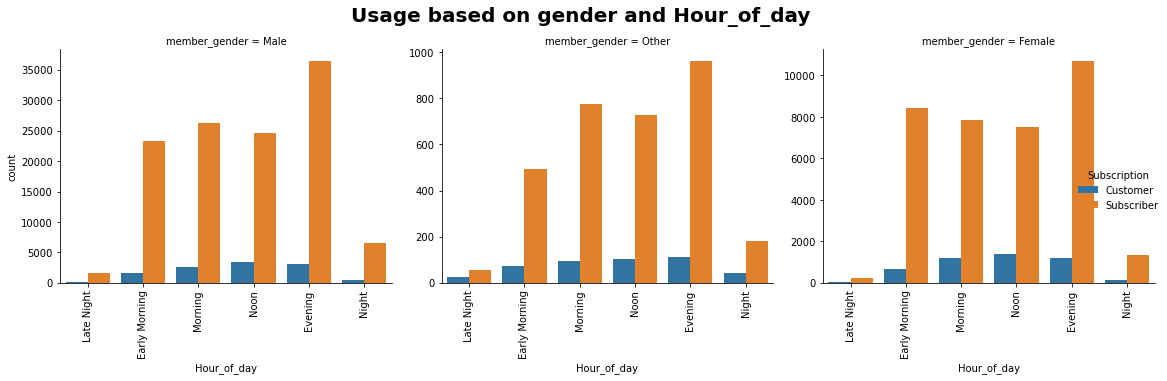

In [44]:
ax = sns.catplot(data=df, x='Hour_of_day', col='member_gender', hue='user_type', 
               kind='count', sharey = False)
ax._legend.set_title('Subscription')
for axes in ax.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()
ax.fig.suptitle("Usage based on gender and Hour_of_day", fontsize=20, fontweight="bold", y= 1.05)
plt.show()

This plots above shows that all genders had the highest number of trips in the evening which supports the analysis made earlier on evenings being the period with the highest number of trips. This could mean they take more trips when they are returning to their homes from work or anywhere they went to in the morning.
For Male and other genders there is an increasing pattern from late night till morning reverse is the case for the female gender.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
The previous analysis of subscribers taking more trips on thursday evenings while customers took more trips on weekends was further strengthened.

### Were there any interesting or surprising interactions between features?

There is an increasing pattern from early morming till noon in trips taken by males while there is a decreasing pattern in that of females. This means that more females set out early than males.

## Conclusions
From the analysis made, here are some conclusions I made:

* Majority of the users(91%) have subscriptions.

* There more males among the users.

* Most trips occur on Thursday evenings

* Users between ages 25 and 35 took the highest no of trips

* Customers took longer trips than subscribers.

* Females set out in the morning earlier than males.